## DSCI 552 : HomeWork 4: Part-A

### Name: Jayantraj CS (USC ID: 3993-1362-35)

In [2]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
import seaborn as sns
from sklearn.impute import SimpleImputer
import time as t
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import random
import math
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
java_home = os.environ.get('JAVA_HOME', None)
java_path=''
if not java_home:
    java_path = '/Library/Internet Plug-Ins/JavaAppletPlugin.plugin/Contents/Home'
    os.environ['JAVA_HOME'] = java_path
else:
    print(java_home)

import weka.core.jvm as jvm
import javabridge
jvm.start()
from weka.classifiers import Classifier, Evaluation
from weka.core.converters import Loader
from weka.core.classes import Random
import weka.plot.classifiers as plcls

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


/Library/Java/JavaVirtualMachines/jdk-9.0.4.jdk/Contents/Home


## *Question 1.) The LASSO and Boosting for Regression*

## *Question 1.a) Download the Communities and Crime data*

In [4]:
# we are manually renaming the files from communities.data to communities.csv and communities.names to communities_names.txt.

df = pd.read_csv("../data/communities.csv")
file = open("../data/communities_names.txt","r")
buffer = file.readlines()
attribute_names =[]
for i in buffer:
    temp = i.split(' ')
    if temp[0] =='@attribute':
        attribute_names.append(temp[1])

print('The Total Number of Attributes:',len(attribute_names))
# By examining the dataset, we find the first 5 predictors are non-predictive, i.e, they are not used in the predicting the response variable.
# The non-predictive attributes are:
# 1.state
# 2.county
# 3.community
# 4.communityname
# 5.fold
data = pd.read_csv("../data/communities.csv", sep=",", header=None, names=attribute_names, na_values='?')
df = data.iloc[:, 5:]

The Total Number of Attributes: 128


In [5]:
# Displays the first 4 rows of the dataset.
# The new dataset now has 123 columns, out of which 122 columns are predictors and 1 column is a response column.

df.head(4)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=123)

## *Question 1.b) Use a data imputation technique to deal with the missing values in the data set.*

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_new = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

train_data = df_new.iloc[:1495, :]
test_data = df_new.iloc[1495:, :]

In [9]:
print("Dimensions of train data ",train_data.shape)
print("Dimensions of test data ",test_data.shape)

Dimensions of train data  (1495, 123)
Dimensions of test data  (499, 123)


In [10]:
train_data.head(4)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.030000,0.130000,0.960000,0.170000,0.060000,0.180000,0.440000,0.130000,0.940000,0.930000,0.03000,0.070000,0.100000,0.070000,0.020000,0.57000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.3

In [11]:
test_data.head(4)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,0.02,1.0,0.73,0.48,0.31,0.85,0.37,0.12,0.49,0.83,1.00,1.00,0.72,0.48,0.41,0.11,0.96,0.00,0.07,0.04,0.03,0.98,0.11,0.65,0.11,0.73,0.04,0.99,0.75,0.43,0.90,0.88,0.24,0.60,0.70,0.83,0.42,0.61,0.57,0.00,0.21,0.01,0.18,0.18,0.24,0.27,0.14,0.12,0.15,0.15,0.86,0.03,0.09,0.06,0.21,0.27,0.13,0.63,0.05,0.51,0.5,0.01,0.91,0.58,0.00,0.27,0.35,0.01,0.00,1.00,1.00,1.00,0.78,0.87,1.00,0.85,0.83,0.82,0.29,0.0,0.0,0.33,0.45,0.57,0.56,0.74,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.23,0.73,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,0.02,1.0,0.40,0.87,0.37,0.52,0.14,0.07,0.81,0.36,0.28,0.28,0.33,0.33,0.25,0.25,0.31,0.00,0.14,0.12,0.11,0.33,0.24,0.74,0.11,0.39,0.20,0.48,0.48,0.26,0.54,0.53,0.55,0.76,0.77,0.78,0.75,0.70,0.72,0.00,0.06,0.00,0.27,0.22,0.26,0.34,0.11,0.08,0.08,0.10,0.73,0.08,0.18,0.20,0.61,0.62,0.57,0.59,0.14,0.19,0.5,0.01,0.83,0.59,0.00,0.60,0.79,0.07,0.00,0.13,0.11,0.09,0.33,0.34,0.36,0.36,0.21,0.41,0.94,0.0,0.0,0.17,0.45,0.52,0.59,0.57,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,0.00,0.0,0.08,0.42,0.78,0.35,0.61,0.75,0.41,0.08,0.11,0.14,0.13,0.17,0.13,0.15,0.17,0.03,0.94,0.64,0.67,0.33,0.65,0.28,0.11,0.84,0.36,0.39,0.43,0.67,0.53,0.51,0.49,0.44,0.44,0.68,0.06,0.17,0.26,0.00,0.18,0.00,0.44,0.61,0.75,0.74,0.20,0.24,0.28,0.25,0.54,0.25,0.35,0.29,0.40,0.42,0.39,0.48,0.29,0.60,0.0,0.02,0.55,0.48,0.15,0.61,0.46,1.00,0.39,0.04,0.04,0.06,0.11,0.12,0.11,0.09,0.62,0.32,0.39,0.0,0.0,0.19,0.47,0.37,0.38,0.49,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,0.06,1.0,0.47,0.72,0.14,0.52,0.44,0.19,0.62,0.45,0.35,0.34,0.40,0.43,0.34,0.27,0.49,0.01,0.10,0.15,0.29,0.22,0.25,0.66,0.48,0.35,0.44,0.

## *Question 1.c) Plot a correlation matrix for the features in the data set.*

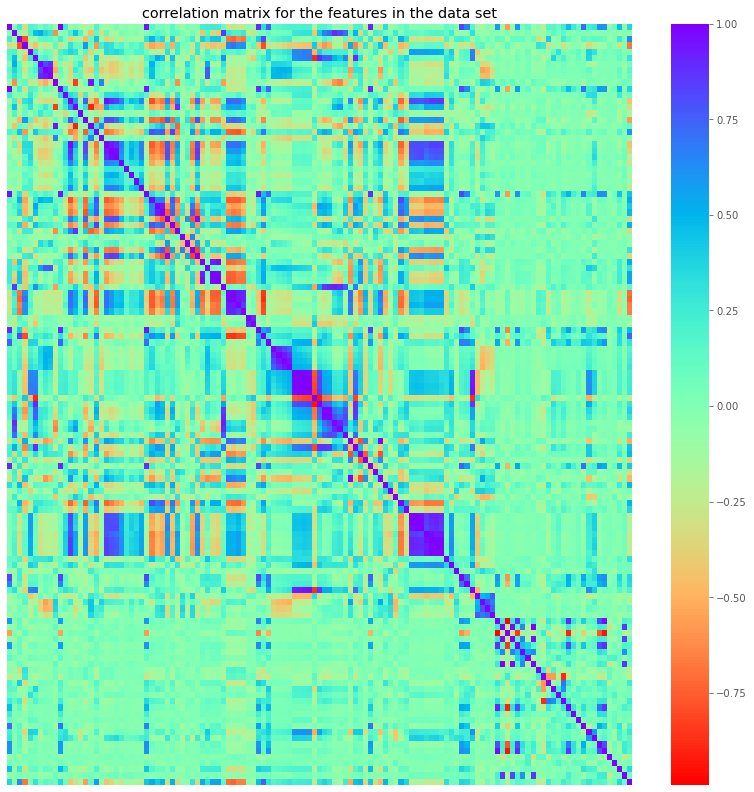

In [12]:
# For plotting the correlation matrix we will be using the complete dataset.

fit, axes = plt.subplots(figsize=(14, 14))
plt.title("correlation matrix for the features in the data set")
sns.heatmap(df_new.corr(), cmap='rainbow_r',xticklabels=False, yticklabels=False, ax=axes)
plt.show()

## *Question 1.d) Calculate the Coefficient of Variation CV for each feature.*

In [13]:
coefficient_cv ={}
for i in attribute_names[5:]:
    val = df_new[i].std()/df_new[i].mean()
    coefficient_cv[i]=val
    print(i,val)

population 2.203502536390972
householdsize 0.3532983018683109
racepctblack 1.4109203963756864
racePctWhite 0.3237815624993411
racePctAsian 1.3591621938222074
racePctHisp 1.614277791710685
agePct12t21 0.36583986883972397
agePct12t29 0.29069288841904145
agePct16t24 0.4951605143654288
agePct65up 0.42344170889026195
numbUrban 2.0017436381957676
pctUrban 0.6388488712113656
medIncome 0.5797533935755996
pctWWage 0.3277100586060616
pctWFarmSelf 0.7000301156104908
pctWInvInc 0.35923994722340613
pctWSocSec 0.36851263032540155
pctWPubAsst 0.699030504203365
pctWRetire 0.3496390828575848
medFamInc 0.527731885342079
perCapInc 0.545633428419145
whitePerCap 0.5075521907214038
blackPerCap 0.5894690036844645
indianPerCap 0.8096850868666168
AsianPerCap 0.6061938508790911
OtherPerCap 0.6706445725467309
HispPerCap 0.4739597186074789
NumUnderPov 2.304969714852185
PctPopUnderPov 0.7539801744357952
PctLess9thGrade 0.6756002166771716
PctNotHSGrad 0.5282862664983298
PctBSorMore 0.5784008385663657
PctUnemployed 

## *Question 1.e) Pick $\lfloor\sqrt{128}\rfloor$ features with highest CV , and make scatter plots and box plots for them.Can you draw conclusions about significance of those features, just by the scatter plots?*

In [14]:
num_of_features = math.floor(math.sqrt(128))
highest_cv_features = sorted(coefficient_cv.items(), key=lambda x: x[1], reverse=True)[:num_of_features]
highest_cv_columns = []
for i in highest_cv_features:
    print(i)
    highest_cv_columns.append(i[0])

('NumStreet', 4.407702440863974)
('NumInShelters', 3.4854812687233436)
('NumIlleg', 2.9941964494842983)
('NumImmig', 2.9004971638852743)
('LemasPctOfficDrugUn', 2.555266002927139)
('NumUnderPov', 2.304969714852185)
('population', 2.203502536390972)
('numbUrban', 2.0017436381957676)
('HousVacant', 1.9587797297820901)
('LandArea', 1.6780314766044726)
('racePctHisp', 1.614277791710685)


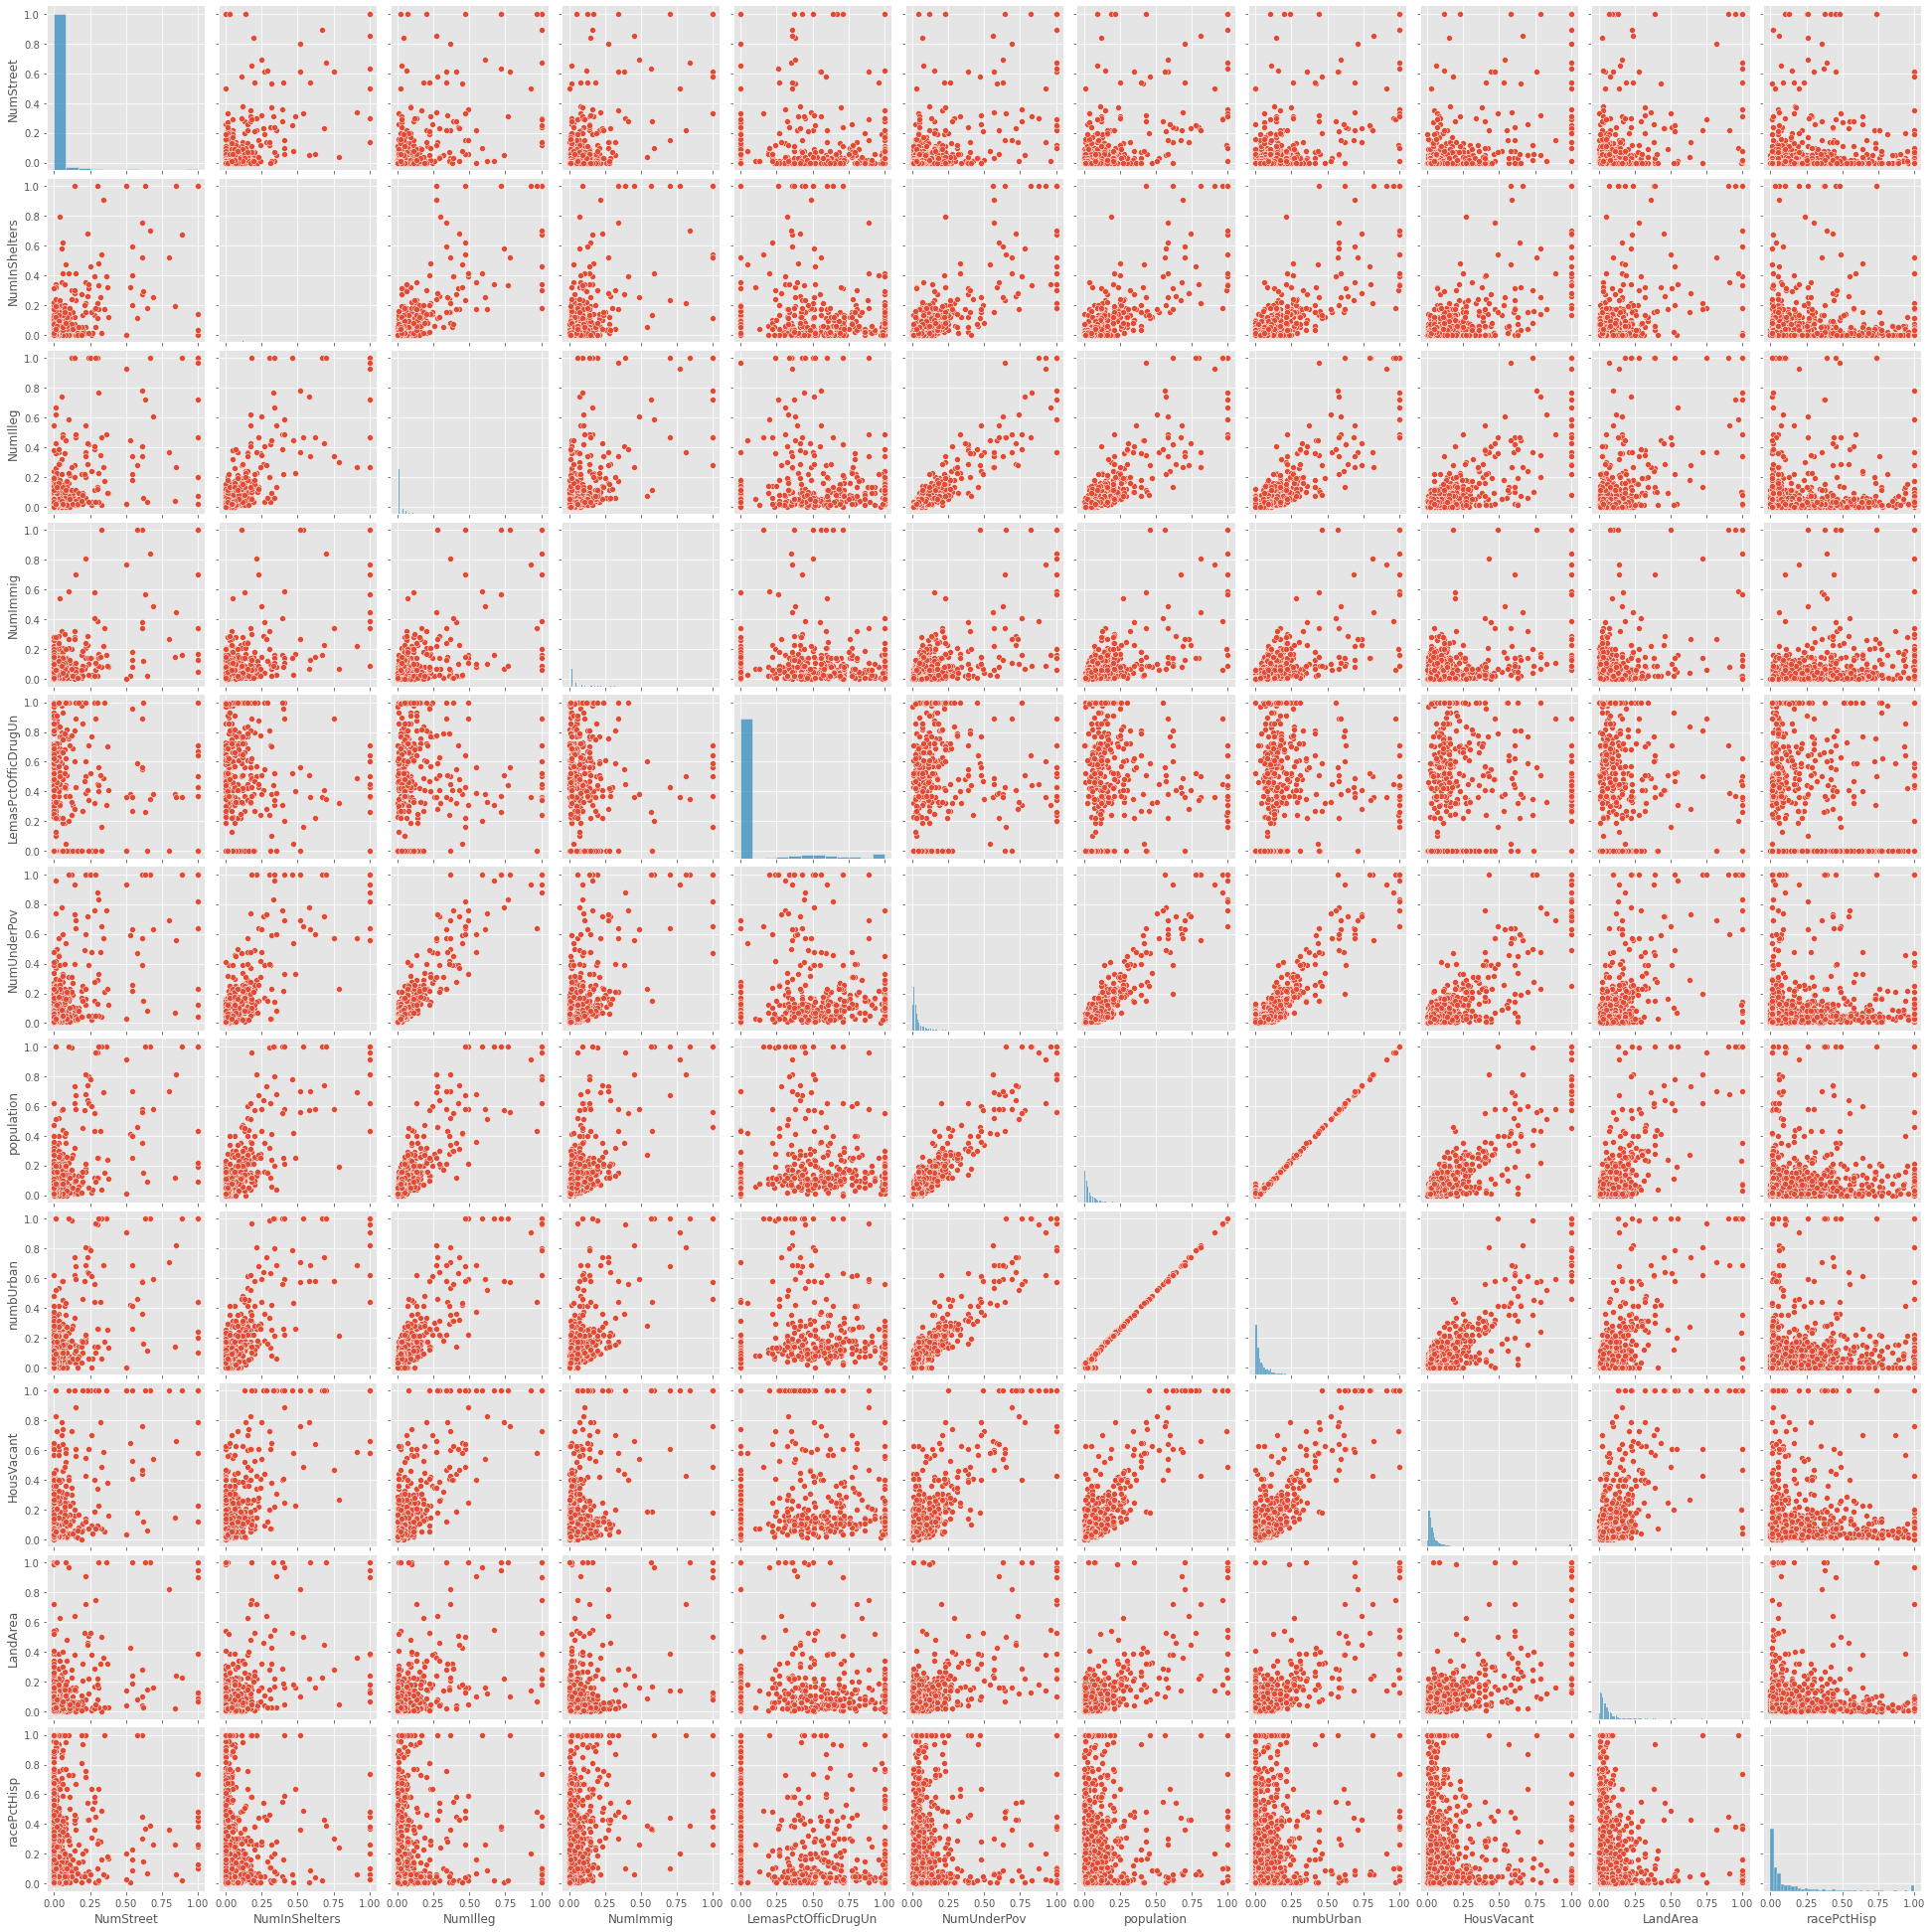

In [15]:
# Plotting a scatter plot.

sns.pairplot(df_new[highest_cv_columns])
plt.show()

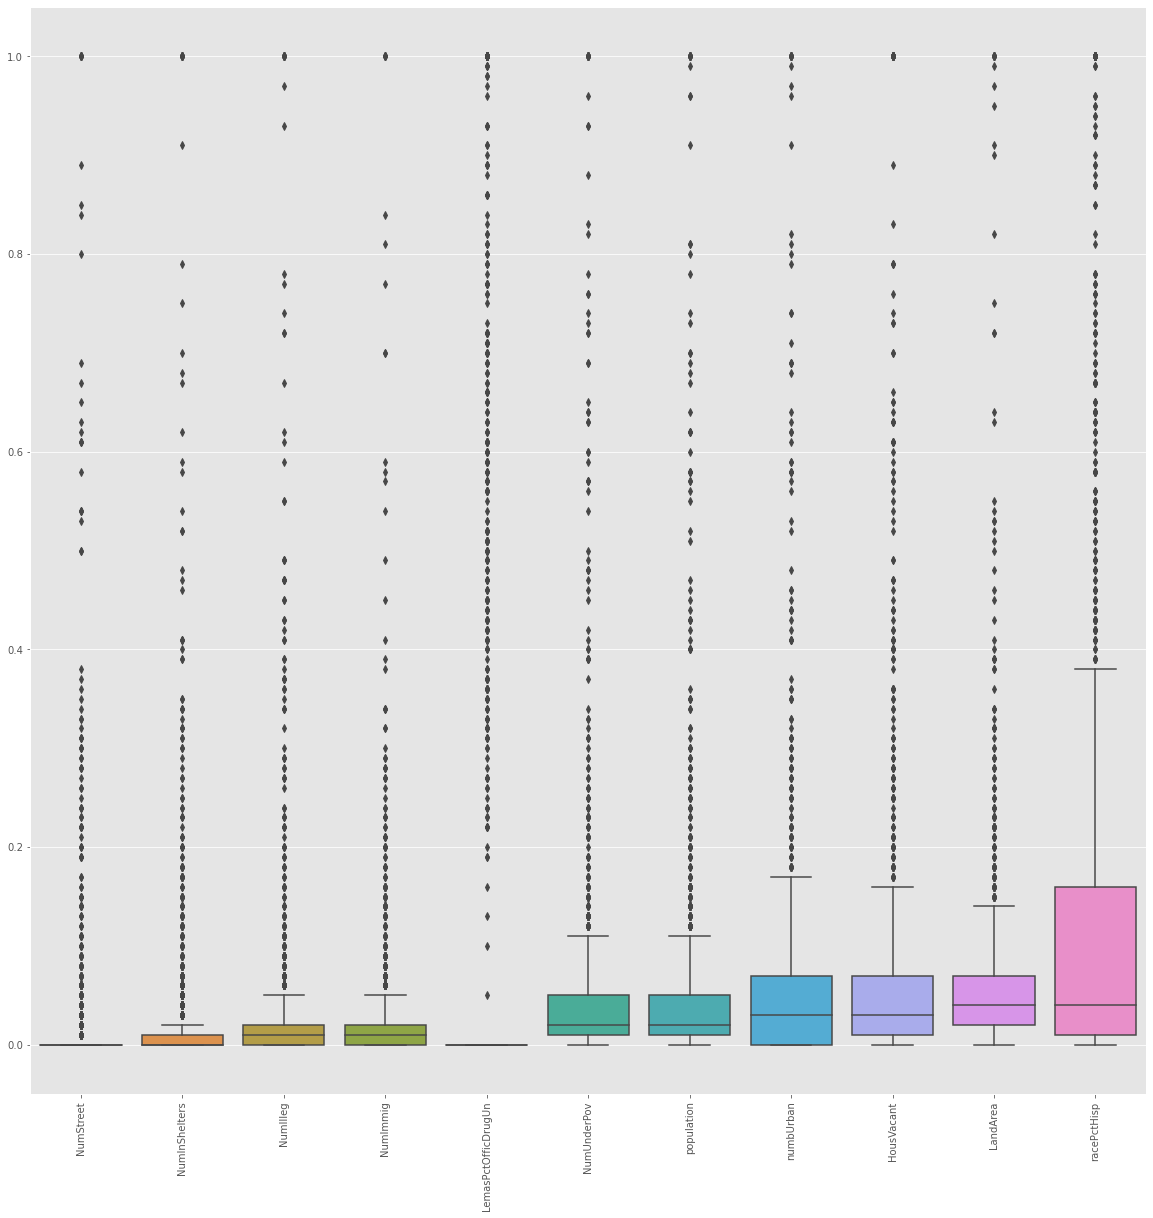

In [16]:
# Plotting the box plot.

fig, axes = plt.subplots(figsize=(20, 20))
sns.boxplot(data=df_new[highest_cv_columns], ax=axes)
plt.xticks(rotation=90)
plt.show()

Just by seeing the scatter plots, we can't draw any conclusions about the significance of the features.
But we can see the correlation between population and numurban and a few other features.
For each feature, we can see the even distribution of the class label along the y-axis, but it is not enough to make any conclusions.


## *Question 1.f) Fit a linear model using least squares to the training set and report the test error.*

In [17]:

def Linear_Model_return_test_error(train_data,test_data):
    train_data_x,train_data_y = train_data.iloc[:, :-1],train_data.iloc[:, -1]
    test_data_x,test_data_y = test_data.iloc[:, :-1],test_data.iloc[:, -1]
    olsreg = LinearRegression(fit_intercept=True)
    olsreg.fit(train_data_x, train_data_y)
    test_pred = olsreg.predict(test_data_x)
    
    test_mse = mean_squared_error(test_data_y, test_pred)
   
    print("Test Mean Squared Error for Ordinary Least Squares Regression:", test_mse)
    return train_data_x,train_data_y,test_data_x,test_data_y

In [18]:
train_data_x,train_data_y,test_data_x,test_data_y = Linear_Model_return_test_error(train_data,test_data)

Test Mean Squared Error for Ordinary Least Squares Regression: 0.7897255274315318


## *Question 1.g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.*

In [19]:
# Function to perform cross_validation and chose the lambda.

def ridge_regression(lambda_values,train_data_x,train_data_y):
    cross_validation = KFold(5, shuffle=True, random_state=123)
    ridge_regression_ = RidgeCV(alphas=lambda_values, cv=cross_validation, scoring='neg_mean_squared_error')
    ridge_regression_.fit(train_data_x, train_data_y)
    return ridge_regression_,ridge_regression_.alpha_


In [20]:
# To see the difference in the cross_validation erros, we take the lambda values to be in the range of 10^-7 to 10^7.

lambda_values = [10**x for x in range(-7,8)]

ridge_regression_,chosen_lambda = ridge_regression(lambda_values,train_data_x,train_data_y)
print("Lambda chosen by cross_validation :",chosen_lambda)


Lambda chosen by cross_validation : 10.0


In [21]:
predictions = ridge_regression_.predict(test_data_x)
test_mse = mean_squared_error(test_data_y, predictions)

print("Test Mean Squared Error for Ridge Regression:", test_mse)

Test Mean Squared Error for Ridge Regression: 0.017440245237760804


We can see that the test mean squared error is better than that of the previous linear regression model without regularization.

## *Question 1.h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.*

In [22]:
def lasso_regression_without_standardization(lambda_values,train_data_x,train_data_y):
    cross_validation = KFold(5, shuffle=True, random_state=123)
    lasso_regression_ = LassoCV(alphas=lambda_values, cv=cross_validation)
    lasso_regression_.fit(train_data_x, train_data_y)
    return lasso_regression_,lasso_regression_.alpha_

In [23]:
# To see the difference in the cross_validation erros, we take the lambda values to be in the range of 10^-7 to 10^7.

lambda_values = [10**x for x in range(-7,8)]
lasso_regression_,chosen_lambda = lasso_regression_without_standardization(lambda_values,train_data_x,train_data_y)
print("Lambda chosen by cross_validation :",chosen_lambda)

Lambda chosen by cross_validation : 0.0001


In [24]:
predictions = lasso_regression_.predict(test_data_x)
test_mse = mean_squared_error(test_data_y, predictions)
print("Test Mean Squared Error for Lasso Regression without standardization:", test_mse)

Test Mean Squared Error for Lasso Regression without standardization: 0.017790185551932514


We can see that the test mean squared error is slightly poor than ridge regression, though the difference is very small.

In [25]:
# Variables selected by the model:
num_of_features_selected = 0
for i in range(len(test_data_x.columns)):
    if lasso_regression_.coef_[i]!=0:
        print(test_data_x.columns[i],end='  ')
        print(lasso_regression_.coef_[i])
        num_of_features_selected+=1
print("\n\n Number of Variables Selected : ",num_of_features_selected)

racepctblack  0.27301989010834155
racePctAsian  -0.017819549316972806
agePct12t21  0.07565215728719175
agePct12t29  -0.2906100088124687
agePct65up  0.00422471999675313
pctUrban  0.040998771722913704
pctWWage  -0.09298375130724065
pctWFarmSelf  0.029028541127984992
pctWInvInc  -0.1098847818769876
pctWSocSec  0.0591461219495719
pctWPubAsst  0.04184843743740864
pctWRetire  -0.10979686383010845
whitePerCap  -0.06910984350862803
blackPerCap  -0.022568808262918533
indianPerCap  -0.03193674252644382
AsianPerCap  0.029241371954433108
OtherPerCap  0.023632000865748886
HispPerCap  0.025681103360608505
PctPopUnderPov  -0.15011762404892395
PctLess9thGrade  -0.021120926617493634
PctBSorMore  0.017324039016577465
PctEmploy  0.15503396489057894
PctEmplManu  -0.019265480107277005
PctOccupManu  0.016592943445386647
MalePctDivorce  0.13269778710724173
MalePctNevMarr  0.15075759446542406
FemalePctDiv  -0.09536974638071015
PctKids2Par  -0.19805153461400754
PctYoungKids2Par  -0.03604499504211619
PctTeen2Pa

In [26]:
def lasso_regression_with_standardization(lambda_values,train_data_x,train_data_y):
    scaling = StandardScaler()
    std_train_data_x,std_test_data_x= scaling.fit_transform(train_data_x),scaling.fit_transform(test_data_x)
    std_train_data_x,std_test_data_x= pd.DataFrame(data=std_train_data_x, columns=train_data_x.columns),pd.DataFrame(data=std_test_data_x, columns=test_data_x.columns)
    cross_validation = KFold(5, shuffle=True, random_state=123)
    lasso_regression_std_ = LassoCV(alphas=lambda_values, cv=cross_validation)
    lasso_regression_std_.fit(std_train_data_x, train_data_y)
    return lasso_regression_std_,lasso_regression_std_.alpha_

In [27]:
# To see the difference in the cross_validation erros, we take the lambda values to be in the range of 10^-7 to 10^7.

lambda_values = [10**x for x in range(-7,8)]

lasso_regression_std_,chosen_lambda = lasso_regression_with_standardization(lambda_values,train_data_x,train_data_y)
print("Lambda chosen by cross_validation :",chosen_lambda)

Lambda chosen by cross_validation : 0.001


In [28]:
predictions = lasso_regression_std_.predict(test_data_x)
test_mse = mean_squared_error(test_data_y, predictions)
print("Test Mean Squared Error for Lasso Regression with standardization:", test_mse)

Test Mean Squared Error for Lasso Regression with standardization: 0.03544803854635233


In [29]:
num_of_features_selected = 0
for i in range(len(test_data_x.columns)):
    if lasso_regression_std_.coef_[i]!=0:
        print(test_data_x.columns[i],end='  ')
        print(lasso_regression_std_.coef_[i])
        num_of_features_selected+=1
print("\n\n Number of Variables Selected : ",num_of_features_selected)

racepctblack  0.06682564914432092
agePct12t21  0.005221056523623917
agePct12t29  -0.028514865952531197
pctUrban  0.01567053073892015
pctWWage  -0.008756289766821228
pctWFarmSelf  0.0029021211679858623
pctWInvInc  -0.018071439467780216
pctWSocSec  0.006824500738486479
pctWPubAsst  0.0035275474223812543
pctWRetire  -0.015685738051926287
whitePerCap  -0.004074518305149907
blackPerCap  -0.003139326804799334
indianPerCap  -0.004994536772324348
AsianPerCap  0.004857435342150066
OtherPerCap  0.003449135329587318
HispPerCap  0.0031170042141285496
PctPopUnderPov  -0.021026728887874834
PctLess9thGrade  -0.00014117194438733642
PctEmploy  0.014341098112581743
PctEmplManu  -0.00020662703428683699
MalePctDivorce  0.015066027980477913
MalePctNevMarr  0.015071833954085121
FemalePctDiv  -0.00241061251772677
PctKids2Par  -0.039628456053203504
PctYoungKids2Par  -0.008842174365871128
PctTeen2Par  -0.0005539925792072787
PctWorkMom  -0.019233670957305778
NumIlleg  -0.0018774250475875798
PctIlleg  0.02553455

From cross-validation, we get the lambda value to be equal to 0.001, and a test error of 0.035, which is poorer than the previous Lasso with non-standardized features which had a test error of 0.0177. 
since we already know that the data is normalized before, it is not a wise idea to perform the redundant job of standardizing the features again.


## *Question 1.i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.*

In [30]:

average_validation_error,k,minimum,best_m = {},5,float('inf'),-1
for m in range(1,len(train_data_x.columns)+1):
    average_validation_error[m]=0
    cross_validation = KFold(k,shuffle=True,random_state=123)
    for train_index,validation_index in cross_validation.split(train_data_x):
        present_train_data_x,present_train_data_y,present_validation_data_x,present_validation_data_y = train_data_x.iloc[train_index,:],train_data_y.iloc[train_index],train_data_x.iloc[validation_index,:],train_data_y.iloc[validation_index]
        pca = PCA(n_components=m).fit(present_train_data_x)
        pca_train = pca.transform(present_train_data_x)
        pca_validation = pca.transform(present_validation_data_x)
        olsreg = LinearRegression()
        olsreg.fit(pca_train, present_train_data_y)
        prediction_validation = olsreg.predict(pca_validation)
        validation_mse = mean_squared_error(present_validation_data_y, prediction_validation)
        average_validation_error[m] += validation_mse
    average_validation_error[m]/=k
    if average_validation_error[m]<minimum:
        minimum=average_validation_error[m]
        best_m=m
print('\nThe minimum Validation error is ',minimum,' for M=',best_m)
print('Fitting the PCR model on the training set with M =',best_m)
pca = PCA(n_components=best_m).fit(train_data_x)
pca_train = pca.transform(train_data_x)
pca_test = pca.transform(test_data_x)
olsreg = LinearRegression().fit(pca_train, train_data_y)
test_predictions = olsreg.predict(pca_test)
test_mse = mean_squared_error(test_data_y, test_predictions)
print("Test Error obtained for PCR Model is ", test_mse)


The minimum Validation error is  0.019875869217193236  for M= 102
Fitting the PCR model on the training set with M = 102
Test Error obtained for PCR Model is  0.018294985246067458


We can see that the test error is 0.018294985246067458 for the 102 principal components (best). I feel PCR is not good for this dataset since it chooses a lot of principal components.

## *Question 1.j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.*

In [31]:
train_Dmatrix,test_Dmatrix = xgb.DMatrix(data=train_data_x, label=train_data_y),xgb.DMatrix(data=test_data_x) 
average_validation_error_xg,k,minimum,best_alpha = {},5,float('inf'),-1
alphas = [10 ** i for i in range(-15, 16)]

cross_validation = KFold(k, shuffle=True, random_state=123)

for alpha in alphas:
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", reg_alpha=alpha)
    cv_residual = cross_val_score(xgb_model, train_data_x, train_data_y, cv=cross_validation,scoring="neg_mean_squared_error")
    average_validation_error_xg[alpha] = np.abs(cv_residual.mean())
    if average_validation_error_xg[alpha]<minimum:
        minimum = average_validation_error_xg[alpha]
        best_alpha = alpha
        
print('\nThe minimum Validation error is ',minimum,' for alpha=',best_alpha)

print('\nFitting the model with alpha =',best_alpha)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=best_alpha).fit(train_data_x, train_data_y)
test_predictions= xgb_model.predict(test_data_x)
test_mse = mean_squared_error(test_data_y, test_predictions)
print("Test Error obtained for XGBoost Model is ", test_mse)


The minimum Validation error is  0.021604846151750717  for alpha= 1

Fitting the model with alpha = 1
Test Error obtained for XGBoost Model is  0.017528005381199942
